# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


Loaded 196,647 records with features


In [2]:
##Part 1
#Same read data
df_corr = pd.read_csv("output/q4_rolling_features.csv")

# num only
numeric_cols = df_corr.select_dtypes(include=['float64', 'int64']).columns

# calculate matrix
corr_matrix = df_corr[numeric_cols].corr()

corr_matrix = corr_matrix.dropna(axis=0, how="all").dropna(axis=1, how="all")
#save
corr_matrix.to_csv("output/q5_correlations.csv")
print("Saved to output/q5_correlations.csv")
print(corr_matrix.head())

Saved to output/q5_correlations.csv
                      Air Temperature  Wet Bulb Temperature  Humidity  \
Air Temperature              1.000000              0.828320  0.008490   
Wet Bulb Temperature         0.828320              1.000000  0.140509   
Humidity                     0.008490              0.140509  1.000000   
Total Rain                   0.383968              0.394606  0.088805   
Wind Direction              -0.103260             -0.124068 -0.137980   

                      Total Rain  Wind Direction  Wind Speed  \
Air Temperature         0.383968       -0.103260   -0.235268   
Wet Bulb Temperature    0.394606       -0.124068   -0.163313   
Humidity                0.088805       -0.137980    0.006658   
Total Rain              1.000000        0.032530   -0.073490   
Wind Direction          0.032530        1.000000   -0.115959   

                      Maximum Wind Speed  Barometric Pressure  \
Air Temperature                -0.129307            -0.246997   
Wet Bulb T

Saved to output/q5_patterns.png


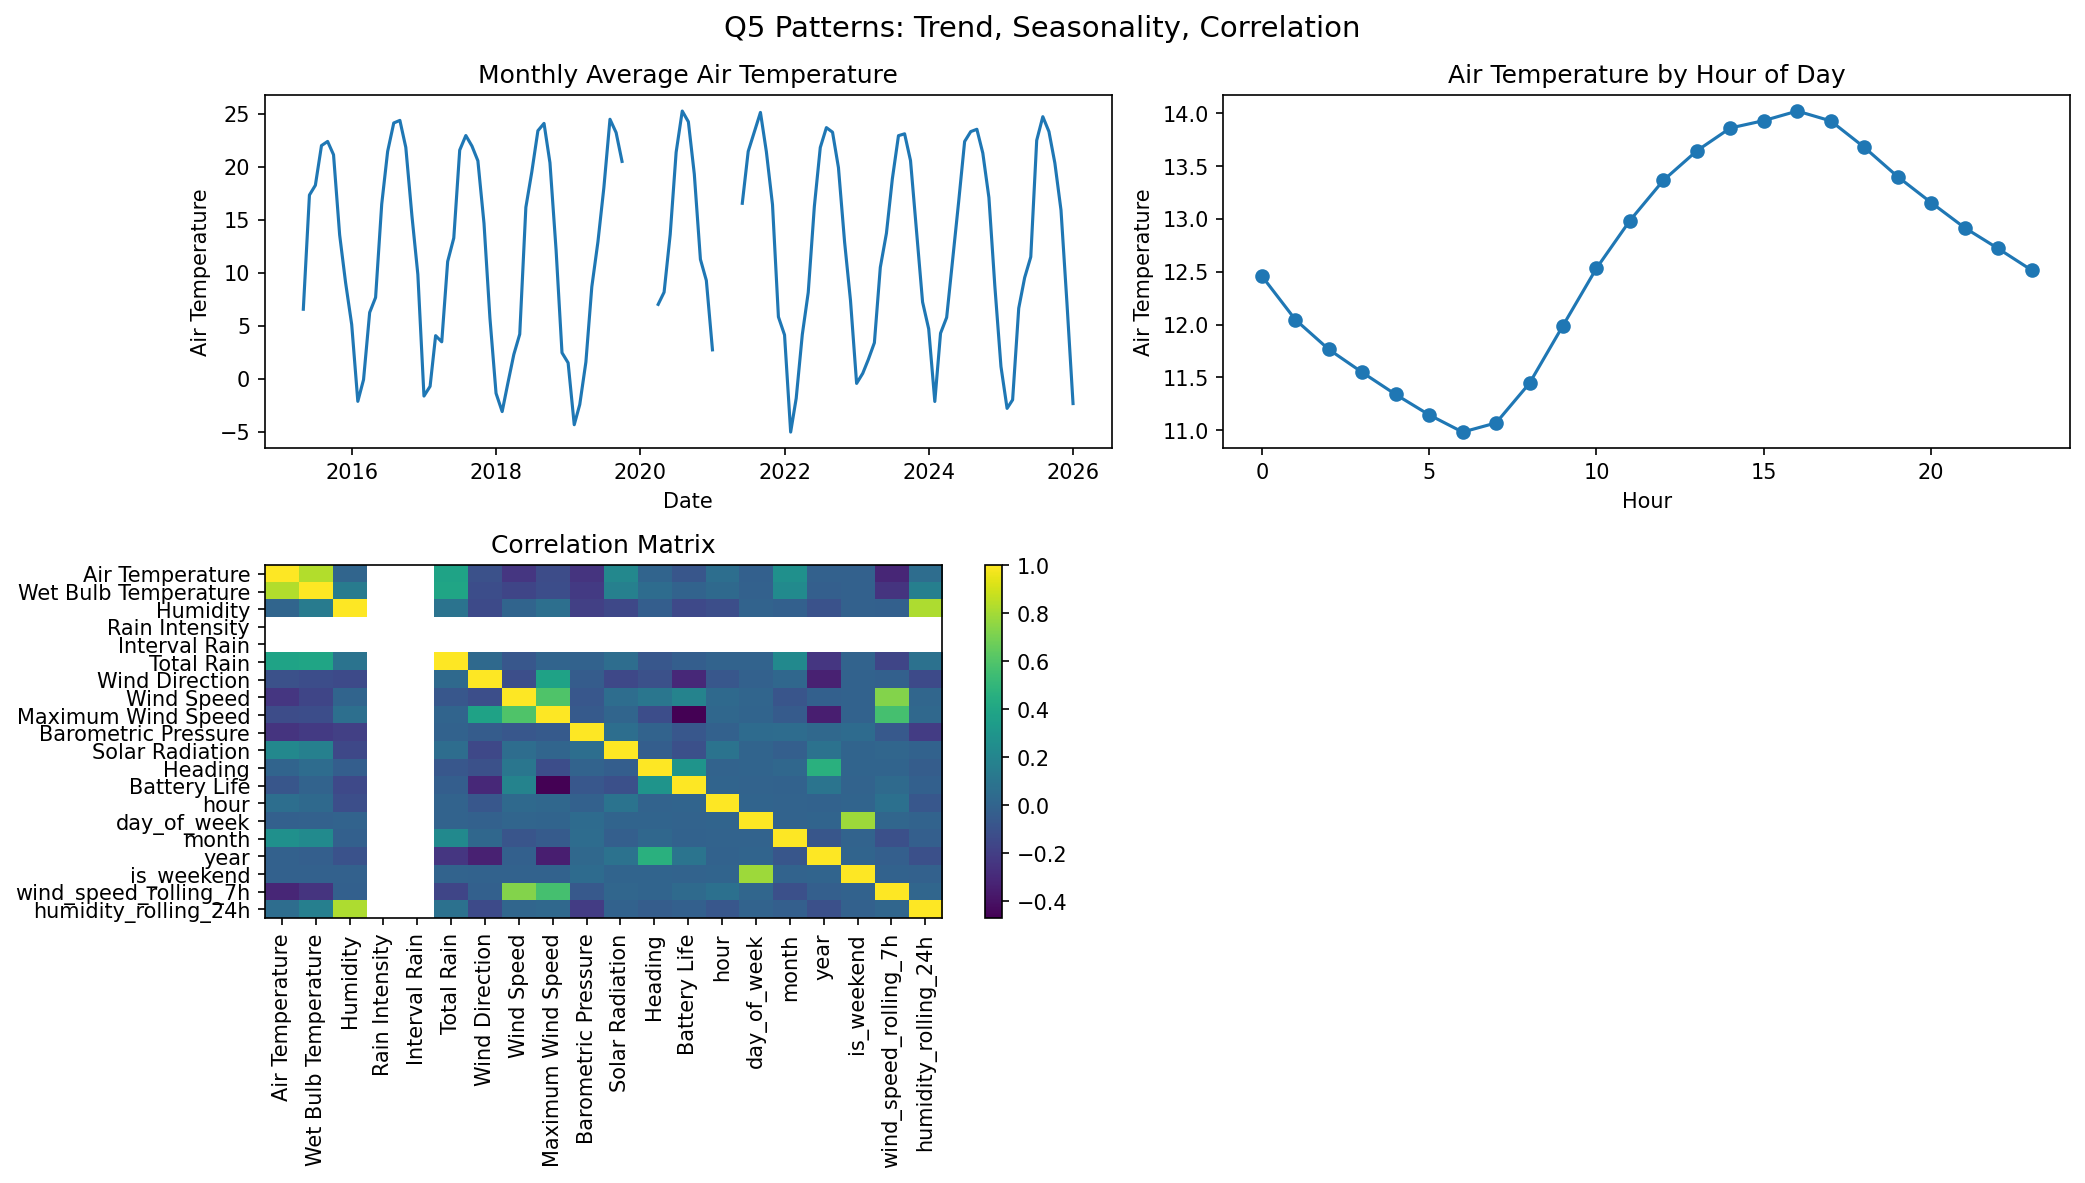

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 2:

# read data
df_vis = pd.read_csv("output/q4_rolling_features.csv")
df_vis["Measurement Timestamp"] = pd.to_datetime(
    df_vis["Measurement Timestamp"],
    errors="coerce"
)

# set index for time-based ops
df_vis = df_vis.set_index("Measurement Timestamp").sort_index()

# most important feature
var = "Air Temperature"

# --- FIX: use "M" (month-end) instead of "ME" ---
df_monthly = (
    df_vis[var]
        .resample("M")   # monthly, month-end
        .mean()
)

# hourly averages
df_hourly = df_vis.groupby("hour")[var].mean()

# correlation matrix (if not already defined above)
corr_matrix = df_vis.select_dtypes("number").corr()

# draw
plt.figure(figsize=(14, 8), dpi=150)

# monthly
plt.subplot(2, 2, 1)
plt.plot(df_monthly.index, df_monthly.values)
plt.title(f"Monthly Average {var}")
plt.xlabel("Date")
plt.ylabel(var)

# hourly
plt.subplot(2, 2, 2)
plt.plot(df_hourly.index, df_hourly.values, marker="o")
plt.title(f"{var} by Hour of Day")
plt.xlabel("Hour")
plt.ylabel(var)

# heat map
plt.subplot(2, 2, 3)
im = plt.imshow(corr_matrix, aspect="auto")
plt.colorbar(im)
plt.title("Correlation Matrix")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)

plt.suptitle("Q5 Patterns: Trend, Seasonality, Correlation", fontsize=14)
plt.tight_layout()

# save
plt.savefig("output/q5_patterns.png", dpi=150)
print("Saved to output/q5_patterns.png")


In [11]:
## Part 3:

# if not already ensured in Part 2:
# df_vis["Measurement Timestamp"] = pd.to_datetime(df_vis["Measurement Timestamp"], errors="coerce")

# monthly aggregation for the key variable
df_monthly = df_vis[var].resample("M").mean()


# 1. monthly trend
monthly_min = df_monthly.min()
monthly_max = df_monthly.max()

# 2. daily pattern (df_hourly should come from Part 2)
peak_hour = df_hourly.idxmax()
low_hour = df_hourly.idxmin()

# 3. correlations (corr_matrix should come from Part 2)
numeric_cols = corr_matrix.columns

corr_pairs = []
for i, c1 in enumerate(numeric_cols):
    for j, c2 in enumerate(numeric_cols):
        # only take each pair once and skip self-correlation
        if j <= i:
            continue
        corr_pairs.append((c1, c2, corr_matrix.loc[c1, c2]))

# top corr (by absolute value)
corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
top_corrs = corr_pairs_sorted[:3]

# build summary text
text = ""
text += "KEY PATTERNS IDENTIFIED\n"
text += "=======================\n\n"

text += "TEMPORAL TRENDS:\n"
text += f"- Monthly {var} ranges from {monthly_min:.2f} to {monthly_max:.2f}.\n"
text += f"- {var} shows clear seasonal variation over the year (higher in warmer months, lower in cooler months).\n\n"

text += "DAILY PATTERNS:\n"
text += f"- {var} exhibits a daily cycle.\n"
text += f"- Typical peak around hour {peak_hour}.\n"
text += f"- Typical minimum around hour {low_hour}.\n\n"

text += "TOP CORRELATIONS:\n"
for (c1, c2, corr) in top_corrs:
    text += f"- {c1} vs {c2}: correlation = {corr:.3f}\n"

# save
with open("output/q5_trend_summary.txt", "w") as f:
    f.write(text)

print("Saved to output/q5_trend_summary.txt")
print(text)

Saved to output/q5_trend_summary.txt
KEY PATTERNS IDENTIFIED

TEMPORAL TRENDS:
- Monthly Air Temperature ranges from -5.04 to 25.25.
- Air Temperature shows clear seasonal variation over the year (higher in warmer months, lower in cooler months).

DAILY PATTERNS:
- Air Temperature exhibits a daily cycle.
- Typical peak around hour 16.
- Typical minimum around hour 6.

TOP CORRELATIONS:
- Air Temperature vs Wet Bulb Temperature: correlation = 0.828
- Air Temperature vs Rain Intensity: correlation = nan
- Air Temperature vs Interval Rain: correlation = nan



---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.
